In [15]:
#IMPORTS HERE:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as display

In [16]:
pd.set_option('display.max_columns', None)

column_names = ["Week", "Team", "Day", "Date", "Time", "Link", "Result", "OT",  
        "Rec", "H/A", "Opp", "Score_Tm", "Score_Opp", 
        "Off_1stD", "Off_TotYd", "Off_PassY", "Off_RushY", "Off_TO", 
        "Def_1stD", "Def_TotYd", "Def_PassY", "Def_RushY", "Def_TO", 
        "Exp_Offense", "Exp_Defense", "Exp_SpecTms"]

data3 = pd.read_csv('2023data.csv', skiprows=3, names=column_names)

data3 = data3[data3['Result'].isin(['W', 'L', 'T'])]

data3.drop(columns=['Link', 'Opp'], inplace=True)

data3['OT'] = data3['OT'].apply(lambda x: 'Yes' if x == 'OT' else 'No')
data3['H/A'] = data3['H/A'].apply(lambda x: 'Away' if x == '@' else 'Home')

cols_to_fill = [col for col in data3.columns if col.startswith(('Score', 'Off', 'Def', 'Exp'))]
data3[cols_to_fill] = data3[cols_to_fill].fillna(0)

data3['Week'] = pd.to_numeric(data3['Week'], errors='coerce')
data2 = data3.dropna(subset=['Week'])

rec_split = data3['Rec'].str.split('-', expand=True)
if len(rec_split.columns) == 2:
    rec_split[2] = '0'
rec_split.columns = ['Win', 'Loss', 'Tie']
data3[['Win', 'Loss', 'Tie']] = rec_split

# Replace non-numeric values in 'Win', 'Loss', and 'Tie' columns with 0
data3[['Win', 'Loss', 'Tie']] = data3[['Win', 'Loss', 'Tie']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

data3 = data3.drop(columns=['Rec'])

In [17]:
data3

,Week,Team,Day,Date,Time,Result,OT,H/A,Score_Tm,Score_Opp,Off_1stD,Off_TotYd,Off_PassY,Off_RushY,Off_TO,Def_1stD,Def_TotYd,Def_PassY,Def_RushY,Def_TO,Exp_Offense,Exp_Defense,Exp_SpecTms,Win,Loss,Tie
0,3.0,49ers,Thu,21-Sep,8:15PM ET,W,No,Home,30.0,12.0,26.0,441.0,300.0,141.0,0.0,10.0,150.0,121.0,29.0,1.0,19.00,11.82,-9.72,0,0,0
1,4.0,49ers,Sun,1-Oct,4:25PM ET,W,No,Home,35.0,16.0,30.0,395.0,271.0,124.0,0.0,23.0,362.0,257.0,105.0,0.0,30.46,-9.72,-1.63,0,0,0
2,5.0,49ers,Sun,8-Oct,8:20PM ET,W,No,Home,42.0,10.0,25.0,421.0,251.0,170.0,1.0,8.0,197.0,140.0,57.0,4.0,12.84,23.12,-5.21,0,0,0
3,6.0,49ers,Sun,15-Oct,1:00PM ET,L,No,Away,17.0,19.0,15.0,215.0,107.0,108.0,1.0,18.0,334.0,174.0,160.0,2.0,-6.05,11.32,-7.34,1,0,0
4,7.0,49ers,Mon,23-Oct,8:15PM ET,L,No,Away,17.0,22.0,19.0,325.0,260.0,65.0,3.0,24.0,452.0,378.0,74.0,1.0,5.43,-16.30,6.07,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,14.0,vikings,Sun,10-Dec,4:05PM ET,W,No,Away,3.0,0.0,16.0,231.0,99.0,132.0,0.0,8.0,202.0,146.0,56.0,3.0,-10.05,20.46,-6.43,6,0,0
610,15.0,vikings,Sat,16-Dec,1:00PM ET,L,Yes,Away,24.0,27.0,24.0,424.0,281.0,143.0,2.0,22.0,378.0,298.0,80.0,1.0,8.62,-9.29,-1.35,7,0,0
611,16.0,vikings,Sun,24-Dec,1:00PM ET,L,No,Home,24.0,30.0,19.0,390.0,373.0,17.0,4.0,28.0,389.0,246.0,143.0,1.0,11.43,-15.44,-0.61,8,0,0
612,17.0,vikings,Sun,31-Dec,8:20PM ET,L,No,Home,10.0,33.0,13.0,211.0,144.0,67.0,2.0,28.0,470.0,293.0,177.0,1.0,-14.27,-22.54,12.19,9,0,0


In [18]:
corr3 = data3.corr()
corr3

,Week,Score_Tm,Score_Opp,Off_1stD,Off_TotYd,Off_PassY,Off_RushY,Off_TO,Def_1stD,Def_TotYd,Def_PassY,Def_RushY,Def_TO,Exp_Offense,Exp_Defense,Exp_SpecTms,Win,Loss,Tie
Week,1.000000,-0.003201,-0.011901,-0.052493,0.006127,-0.019304,0.040891,-0.018880,-0.053171,0.001501,-0.016322,0.027965,-0.011966,0.025069,-0.017433,-0.001813,0.821530,-0.222133,NaN
Score_Tm,-0.003201,1.000000,-0.068210,0.607465,0.678739,0.513896,0.408413,-0.316365,0.011983,-0.009757,0.103017,-0.176437,0.301536,0.798461,0.144943,-0.159050,-0.147436,0.024728,NaN
Score_Opp,-0.011901,-0.068210,1.000000,0.014542,-0.008747,0.103465,-0.175641,0.303067,0.608404,0.678372,0.513193,0.408205,-0.317035,-0.145125,-0.798232,0.159740,0.038434,0.128947,NaN
Off_1stD,-0.052493,0.607465,0.014542,1.000000,0.793689,0.614931,0.455910,-0.105559,-0.099832,-0.088406,0.058675,-0.247179,-0.029179,0.712444,-0.099961,-0.325314,-0.160845,0.090246,NaN
Off_TotYd,0.006127,0.678739,-0.008747,0.793689,1.000000,0.827127,0.493396,-0.056276,-0.089381,-0.045938,0.089746,-0.219992,0.017993,0.740967,-0.034543,-0.348865,-0.118708,0.041877,NaN
Off_PassY,-0.019304,0.513896,0.103465,0.614931,0.827127,1.000000,-0.080741,0.007599,0.059358,0.089814,0.166622,-0.098412,-0.054450,0.592992,-0.152159,-0.255422,-0.135502,0.048672,NaN
Off_RushY,0.040891,0.408413,-0.175641,0.455910,0.493396,-0.080741,1.000000,-0.111566,-0.250382,-0.220472,-0.098709,-0.237849,0.116180,0.396360,0.174228,-0.223407,-0.000819,-0.001059,NaN
Off_TO,-0.018880,-0.316365,0.303067,-0.105559,-0.056276,0.007599,-0.111566,1.000000,-0.025374,0.019748,-0.053086,0.116981,-0.200988,-0.454345,-0.058129,-0.047513,-0.022283,-0.006535,NaN
Def_1stD,-0.053171,0.011983,0.608404,-0.099832,-0.089381,0.059358,-0.250382,-0.025374,1.000000,0.794051,0.613395,0.458207,-0.107614,0.097438,-0.713713,0.327995,0.009342,0.121317,NaN
Def_TotYd,0.001501,-0.009757,0.678372,-0.088406,-0.045938,0.089814,-0.220472,0.019748,0.794051,1.000000,0.826516,0.493578,-0.056868,0.033440,-0.740671,0.349878,0.047231,0.132174,NaN


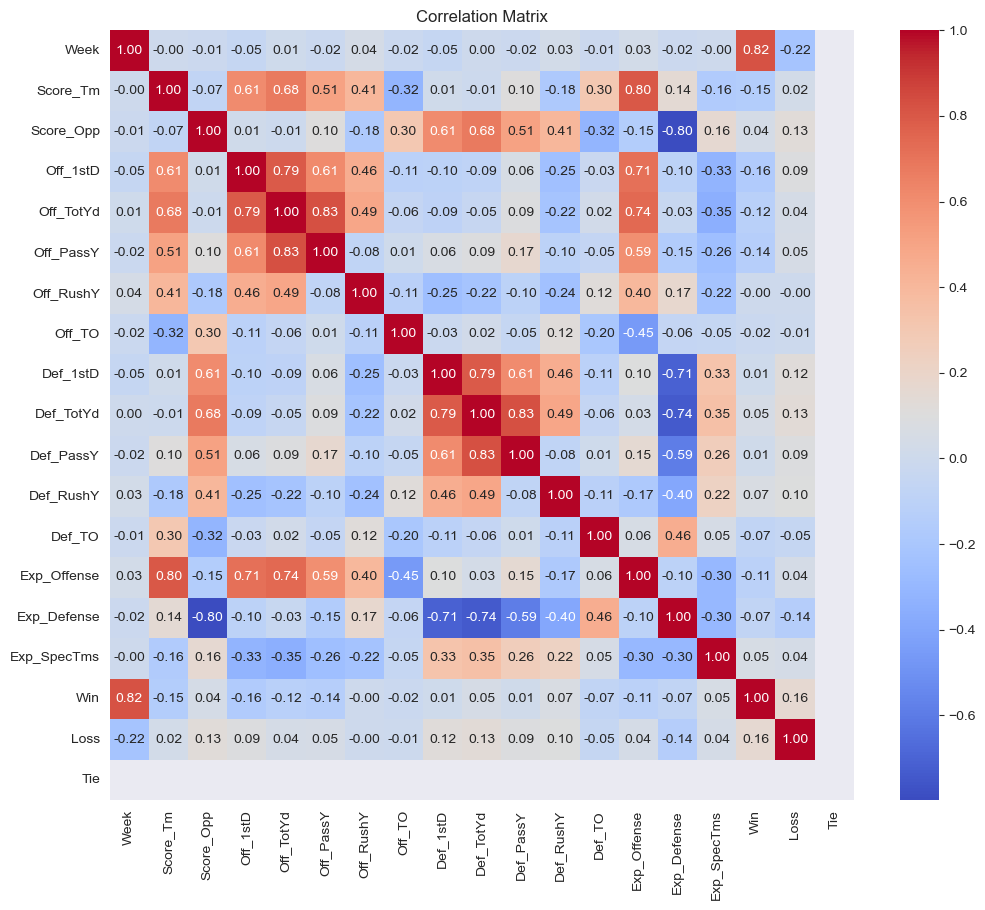

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Find and print the maximum correlation values that aren't 1
print("Maximum correlation values that aren't 1:")
for column in corr3.columns:
    max_corr = corr3[column][corr3[column] < 1].max()
    if not pd.isnull(max_corr):
        print(f"Max correlation for {column}: {max_corr:.2f}")

Maximum correlation values that aren't 1:
Max correlation for Week: 0.82
Max correlation for Score_Tm: 0.80
Max correlation for Score_Opp: 0.68
Max correlation for Off_1stD: 0.79
Max correlation for Off_TotYd: 0.83
Max correlation for Off_PassY: 0.83
Max correlation for Off_RushY: 0.49
Max correlation for Off_TO: 0.30
Max correlation for Def_1stD: 0.79
Max correlation for Def_TotYd: 0.83
Max correlation for Def_PassY: 0.83
Max correlation for Def_RushY: 0.49
Max correlation for Def_TO: 0.46
Max correlation for Exp_Offense: 0.80
Max correlation for Exp_Defense: 0.46
Max correlation for Exp_SpecTms: 0.35
Max correlation for Win: 0.82
Max correlation for Loss: 0.16


In [21]:
# Find and print the maximum correlation values that aren't 1 along with the corresponding variables
print("Maximum correlation values that aren't 1:")
for column in corr3.columns:
    max_corr = corr3[column][corr3[column] < 1].max()
    if not pd.isnull(max_corr):
        correlated_variable = corr3[column][corr3[column] == max_corr].index[0]
        print(f"Max correlation for {column} with {correlated_variable}: {max_corr:.2f}")

Maximum correlation values that aren't 1:
Max correlation for Week with Win: 0.82
Max correlation for Score_Tm with Exp_Offense: 0.80
Max correlation for Score_Opp with Def_TotYd: 0.68
Max correlation for Off_1stD with Off_TotYd: 0.79
Max correlation for Off_TotYd with Off_PassY: 0.83
Max correlation for Off_PassY with Off_TotYd: 0.83
Max correlation for Off_RushY with Off_TotYd: 0.49
Max correlation for Off_TO with Score_Opp: 0.30
Max correlation for Def_1stD with Def_TotYd: 0.79
Max correlation for Def_TotYd with Def_PassY: 0.83
Max correlation for Def_PassY with Def_TotYd: 0.83
Max correlation for Def_RushY with Def_TotYd: 0.49
Max correlation for Def_TO with Exp_Defense: 0.46
Max correlation for Exp_Offense with Score_Tm: 0.80
Max correlation for Exp_Defense with Def_TO: 0.46
Max correlation for Exp_SpecTms with Def_TotYd: 0.35
Max correlation for Win with Week: 0.82
Max correlation for Loss with Win: 0.16


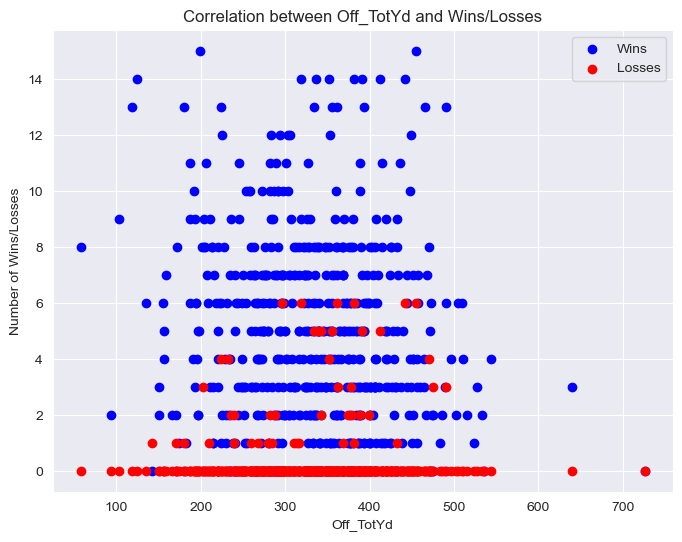

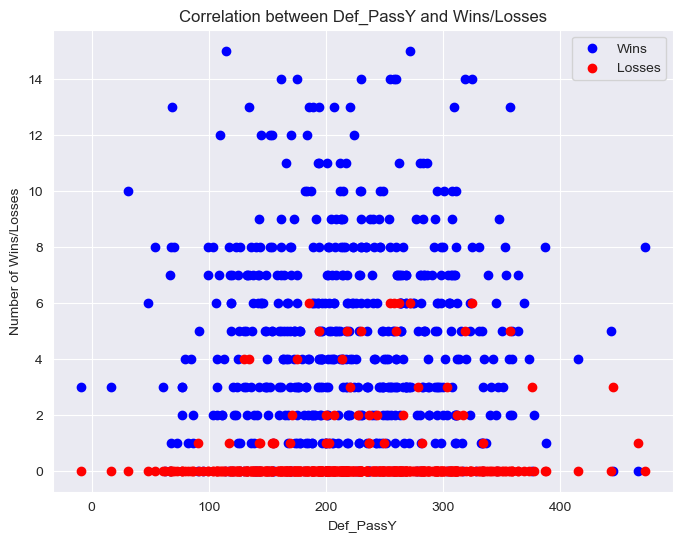

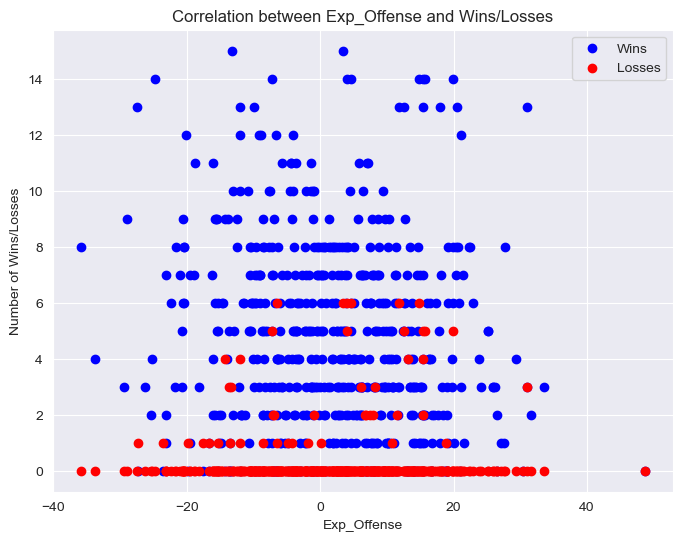

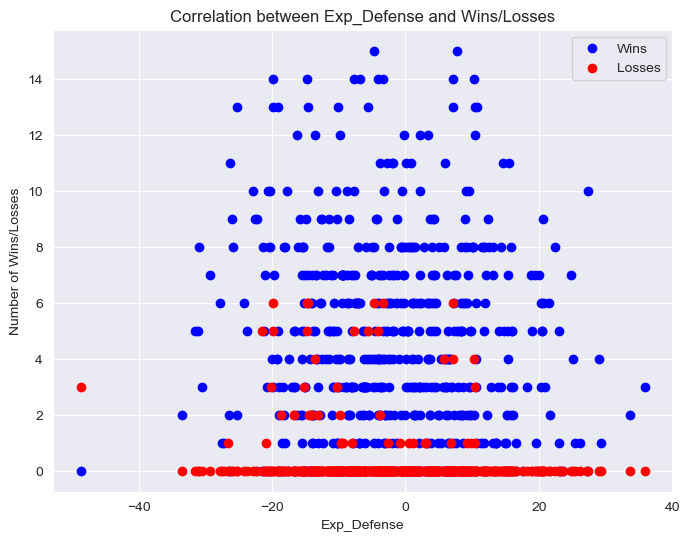

In [23]:
features = ['Off_TotYd', 'Def_PassY', 'Exp_Offense', 'Exp_Defense']

for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data3[feature], data3['Win'], color='blue', label='Wins')
    plt.scatter(data3[feature], data3['Loss'], color='red', label='Losses')
    plt.xlabel(feature)
    plt.ylabel('Number of Wins/Losses')
    plt.title(f'Correlation between {feature} and Wins/Losses')
    plt.legend()
    plt.show()